# Assignment 6: Convolutional Neural Network (CNN) Model — MNIST Digit Classification

**Course:** Introduction to Machine Learning for Social Science<br>
**Course Code:** CSS5230<br>
**Teacher:** [Sahba Zojaji](https://myweb.cuhk.edu.cn/sahbazojaji/Home/Index)<br>
**University:** The Chinese University of Hong Kong, Shenzhen

---

## **Summary**
This notebook provides an introduction to Convolutional Neural Networks (CNNs), showcasing their effectiveness for image classification tasks like handwritten digit recognition. It demonstrates the application of a CNN model on the MNIST dataset. The MNIST dataset is a collection of grayscale images of handwritten digits from 0 to 9. Each image is 28x28 pixels in size and labeled with the corresponding digit.

The dataset includes the following:
- **Training Set:** 60,000 images used to train the model.
- **Test Set:** 10,000 images used to evaluate the model.

---

### **Goal**
The goal is to accurately classify handwritten digit images into their corresponding classes (0 to 9) using a CNN model.

---

## **Before Starting: Verifying TensorFlow Installation**

Before training the model, it is essential to verify that TensorFlow is properly installed and functioning correctly. The following script checks:
- The installed version of TensorFlow.
- Whether TensorFlow is built with CUDA for GPU support (if applicable).
- The availability of GPU devices for TensorFlow.

In [3]:
import tensorflow as tf

# Verify TensorFlow installation
try:
    print("TensorFlow version:", tf.__version__)
    tf.test.is_built_with_cuda()  # Check if TensorFlow is built with CUDA for GPU support
    print("TensorFlow installation is working correctly!")
except Exception as e:
    print("Error with TensorFlow installation:", e)
    exit()

# List all physical devices available to TensorFlow
print("Available devices:", tf.config.list_physical_devices('GPU'))

# Check if TensorFlow is using a GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using a GPU!")
else:
    print("TensorFlow is NOT using a GPU.")


TensorFlow version: 2.19.0
TensorFlow installation is working correctly!
Available devices: []
TensorFlow is NOT using a GPU.


## **Key Steps in the Notebook**
### 1. Data Preprocessing
   - Load the MNIST dataset using TensorFlow or Keras.  
   - Normalize pixel values to a range of 0 to 1 for better model performance.  
   - Reshape the images to include the channel dimension (28x28x1) for compatibility with the CNN model.  

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
# This dataset contains 60,000 training images and 10,000 testing images of handwritten digits (0-9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
# Reshape images to include the channel dimension (28x28x1) and normalize pixel values to the range [0, 1]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Convert labels to one-hot encoding (e.g., label '3' becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 2. Model Architecture
   - Design a CNN architecture with the following layers:
     - Convolutional layers with filters to detect features.
     - Max-pooling layers for dimensionality reduction.
     - Fully connected layers for classification.  
   - Use ReLU activation functions and softmax in the output layer.  

In [5]:
# Build the CNN model
model = Sequential([
    # Define the input layer
    Input(shape=(28, 28, 1)),
    # First convolutional layer with 32 filters of size 3x3 and ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max pooling layer to downsample the feature maps by 2x2
    MaxPooling2D((2, 2)),
    # Second convolutional layer with 64 filters of size 3x3 and ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer to further downsample the feature maps
    MaxPooling2D((2, 2)),
    # Flatten the 2D feature maps into a 1D vector for the fully connected layers
    Flatten(),
    # Fully connected layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (one for each digit) and softmax activation for classification
    Dense(10, activation='softmax')
])

### 3. Model Training
   - Compile the model using the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric.  
   - Train the model on the training set while validating performance using a validation split.  

In [6]:
# Compile the model
# Loss function: categorical cross-entropy for multi-class classification
# Optimizer: Adam for efficient training
# Metric: Accuracy to evaluate performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Train on the training set (X_train, y_train) and validate on the test set (X_test, y_test)
# Epochs: 5 (the number of times the model will pass through the entire training set)
# Batch size: 128 (the number of samples the model processes before updating weights)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8596 - loss: 0.4979 - val_accuracy: 0.9789 - val_loss: 0.0659
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9791 - loss: 0.0666 - val_accuracy: 0.9855 - val_loss: 0.0439
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9873 - loss: 0.0447 - val_accuracy: 0.9878 - val_loss: 0.0376
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9904 - loss: 0.0332 - val_accuracy: 0.9883 - val_loss: 0.0347
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9925 - loss: 0.0236 - val_accuracy: 0.9903 - val_loss: 0.0301


### 4. Model Evaluation
   - Evaluate the model on the test dataset.  
   - Generate metrics such as accuracy and loss.  

Test Accuracy: 0.9903
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


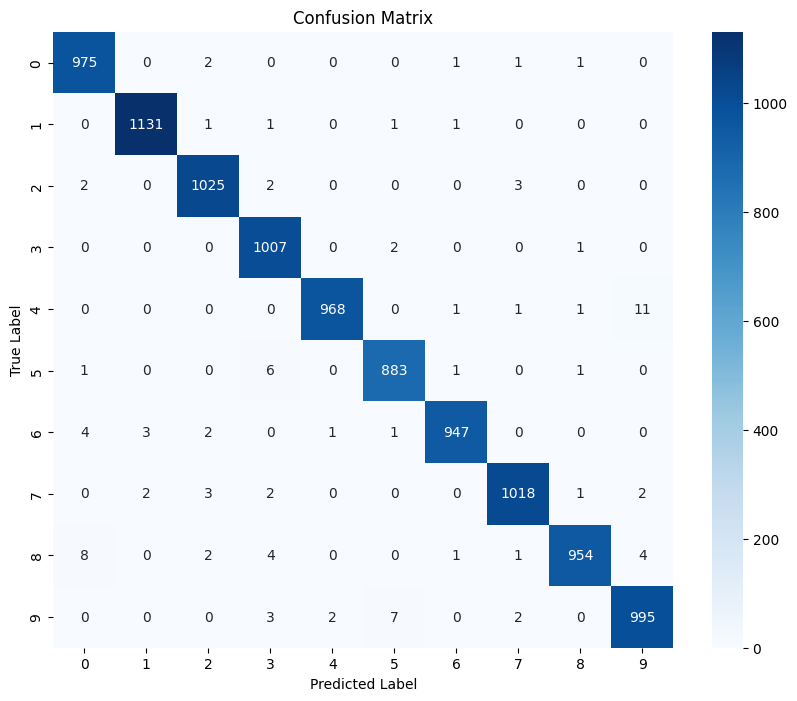

In [9]:
# Evaluate the model on the test set to check its performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")  # Print the accuracy on the test set


from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 5. Visualization of Results:
   - Plot learning curves for accuracy and loss during training.  
   - Display predictions on a sample set of test images along with true labels.

---

## **Metrics**
During training and evaluation, the following metrics will be generated:
- **Accuracy:** Proportion of correctly classified images.  
- **Loss:** Quantifies the error during training and evaluation.  
- **Validation Accuracy:** Accuracy on a subset of the training data (validation split).  
- **Validation Loss:** Loss calculated on the validation split.  

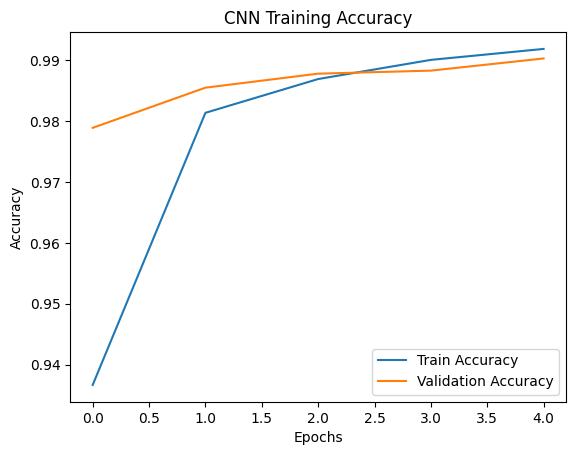

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


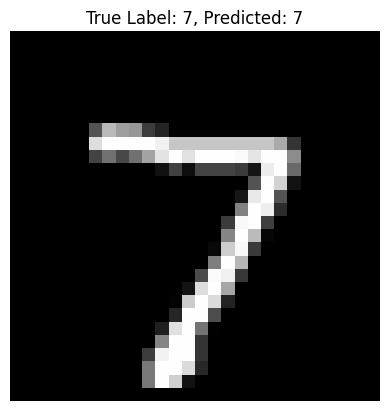

In [8]:
# Visualize training history
# Plot the accuracy during training and validation to show how the model's performance evolves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training Accuracy')  # Add a title to the plot
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish between training and validation accuracy
plt.show()  # Display the plot

# Function to test and visualize a prediction
def visualize_prediction(index):
    # Extract the image and label from the test set
    image = X_test[index].reshape(28, 28)  # Reshape the test image for visualization
    true_label = tf.argmax(y_test[index]).numpy()  # Get the true label
    # Get the model's prediction for the test image
    prediction = tf.argmax(model.predict(X_test[index:index+1]), axis=1).numpy()[0]
    
    # Plot the image along with the true label and predicted label
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    plt.title(f"True Label: {true_label}, Predicted: {prediction}")  # Display labels
    plt.axis('off')  # Hide axes for better visualization
    plt.show()  # Display the plot

# Test the model on a single image by specifying the index
visualize_prediction(0)

# <span style="color:red">CNN Architecture and Hyperparameter Tuning Assignment (10 points)</span>

## Objective
Explore the impact of different CNN architectures and hyperparameters on the performance of a Convolutional Neural Network (CNN) model trained on the MNIST dataset.

## Instructions:
1. Modify CNN Architecture
Experiment with:
- Adding more Conv2D layers (e.g., 128 filters).
- Changing filter sizes (e.g., 5x5 instead of 3x3).
- Changing neurons in the dense layer (e.g., 256 instead of 128).


2. Tune Hyperparameters
Experiment with:
- Learning rate: Try 0.01, 0.001, 0.0001.
- Batch size: Try 32, 64, 256.
- Epochs: Try 10, 20.

For each combination:

- Record test accuracy.
- Plot training/validation accuracy and loss.
- Provide the outputs of metrics, the confusion matrix, and the loss curve for different combinations of hyperparameters in your report.


**At least 2 combinations must be included in your final report.**